In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ds = pd.read_csv('../data/movies.csv')

In [5]:
ds.head()

,Title,Year,Genre,Duration,Director,Rating,Popularity
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58


In [7]:
ds.shape

(5275, 7)

In [8]:
ds.isnull().sum()

Title         0
Year          0
Genre         0
Duration      0
Director      0
Rating        0
Popularity    0
dtype: int64

In [9]:
# how many movies were produced every year?

In [15]:
ds['Year'].value_counts().sort_index()

Year
2001    167
2002    186
2003    139
2004    150
2005    210
2006    292
2007    284
2008    260
2009    327
2010    282
2011    328
2012    370
2013    382
2014    393
2015    388
2016    375
2017    386
2018    356
Name: count, dtype: int64

In [16]:
ds['Year'].value_counts().sort_index(ascending=False)

Year
2018    356
2017    386
2016    375
2015    388
2014    393
2013    382
2012    370
2011    328
2010    282
2009    327
2008    260
2007    284
2006    292
2005    210
2004    150
2003    139
2002    186
2001    167
Name: count, dtype: int64

In [17]:
# who  were the top directors in terms of most movies

In [18]:
ds['Director'].value_counts()

Director
Tyler Perry                     15
John Lyde                       10
Joe Swanberg                    10
Timothy Woodward Jr.            10
James Franco                     8
                                ..
Matthew Montgomery               1
Stephan Schultze                 1
Rob Pallatina                    1
William Tannen                   1
Andrew Adamson, Vicky Jenson     1
Name: count, Length: 3772, dtype: int64

In [20]:
ds['Director'].value_counts()[ds.Director.value_counts() >= 7]

Director
Tyler Perry             15
John Lyde               10
Joe Swanberg            10
Timothy Woodward Jr.    10
James Franco             8
Michael Polish           8
Mark Atkins              7
Charles Band             7
Edward Burns             7
Ti West                  7
Jesse V. Johnson         7
Matt Riddlehoover        7
David Gordon Green       7
Leigh Scott              7
Name: count, dtype: int64

In [21]:
movies_yearly = ds['Year'].value_counts().sort_index(ascending=False)

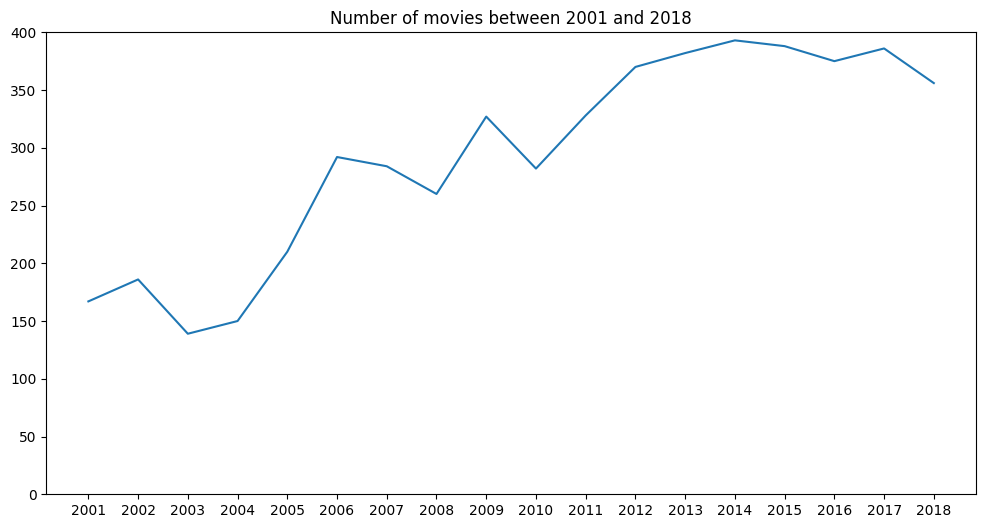

In [27]:
plt.figure(figsize=(12,6))
plt.plot(movies_yearly)
plt.xticks(movies_yearly.index)
plt.ylim(top=400, bottom=0)
plt.title('Number of movies between 2001 and 2018')
plt.show()

In [28]:
genre_tab = ds['Genre'].value_counts()
genre_tab

Genre
Comedy       1670
Drama        1187
Action        751
Horror        689
Crime         342
Biography     144
Animation     139
Adventure     139
Thriller       69
Fantasy        45
Sci-Fi         24
Mystery        22
Romance        21
Family         17
Music           6
Musical         5
Western         3
History         1
Sport           1
Name: count, dtype: int64

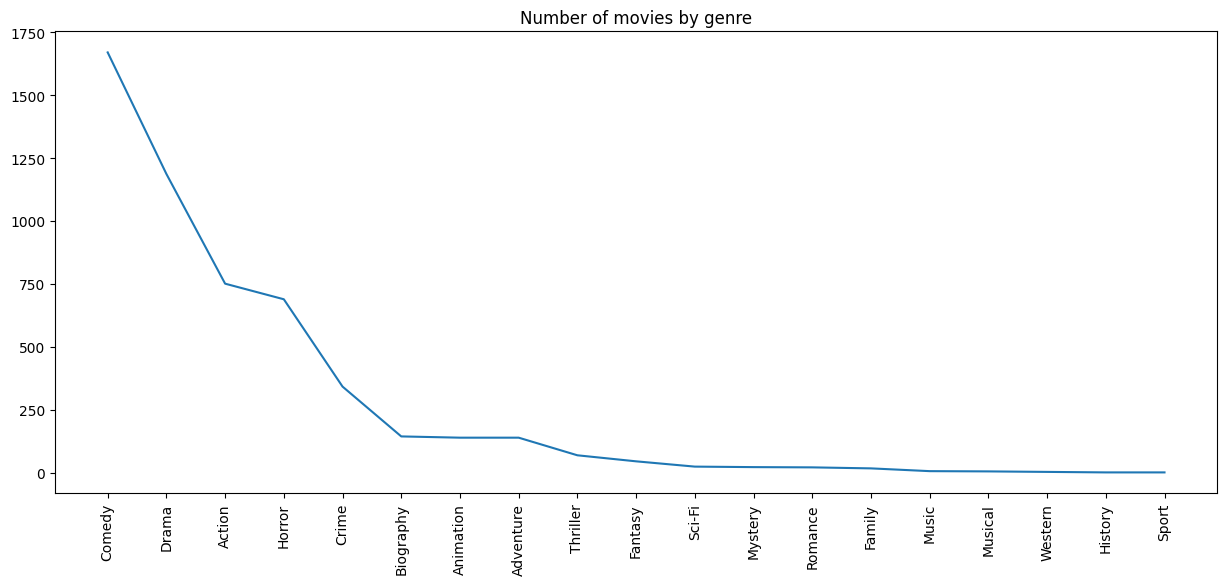

In [34]:
plt.figure(figsize=(15,6))
plt.plot(genre_tab)
plt.xticks(rotation=90)
plt.title('Number of movies by genre')
plt.show()

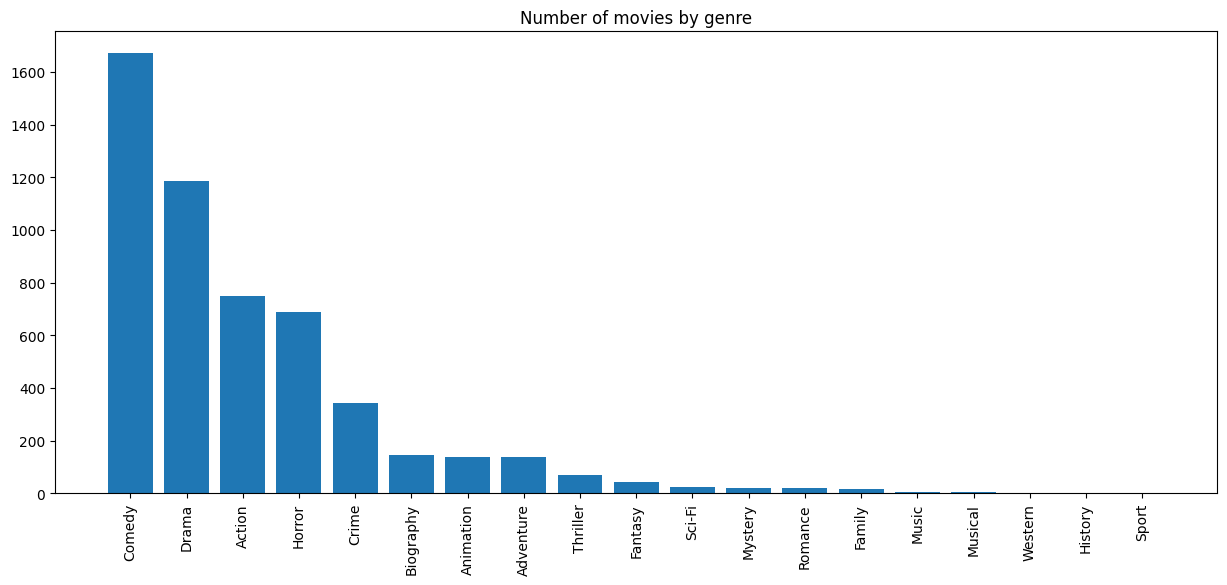

In [36]:
plt.figure(figsize=(15,6))
plt.bar(x=genre_tab.index, height=genre_tab.values)
plt.xticks(rotation=90)
plt.title('Number of movies by genre')
plt.show()

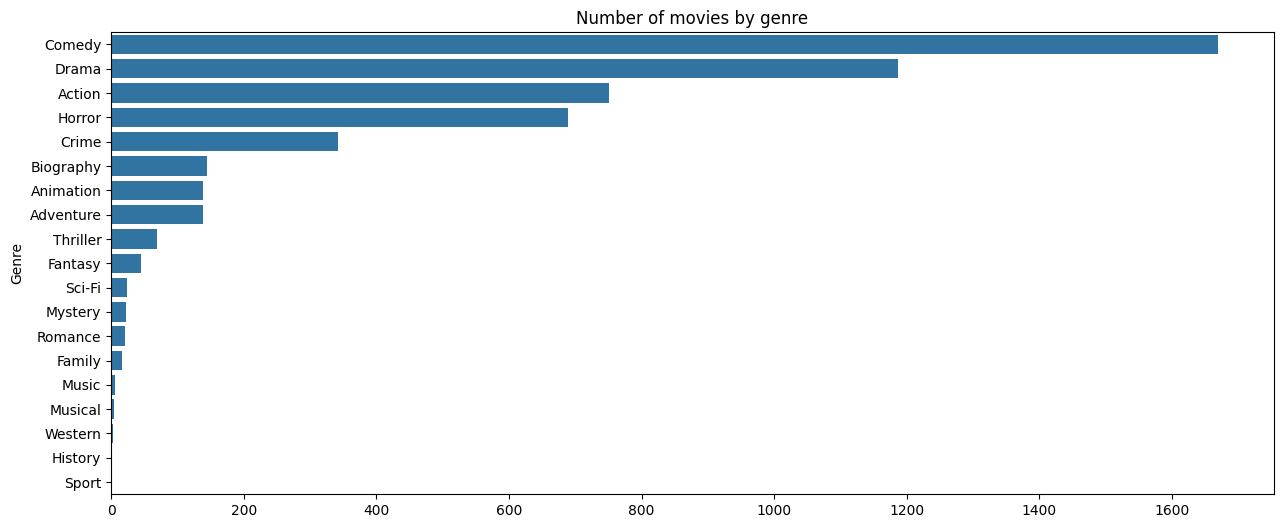

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x=genre_tab.values, y=genre_tab.index)
plt.title('Number of movies by genre')
plt.show()

In [40]:
# what is the percentage of movies with rating of less than 6 and 7 and above 7

In [41]:
ds['ratings_cat'] = np.where(ds.Rating >= 7, 'High', np.where(ds.Rating >= 6, 'Medium', 'Low'))

In [42]:
ds

,Title,Year,Genre,Duration,Director,Rating,Popularity,ratings_cat
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83,Low
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69,Low
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08,Low
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60,Medium
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58,Medium
...,...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69,Medium
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21,Medium
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14,Low
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68,Low


In [45]:
ds['ratings_cat'].value_counts(normalize=True)

ratings_cat
Low       0.640190
Medium    0.281517
High      0.078294
Name: proportion, dtype: float64

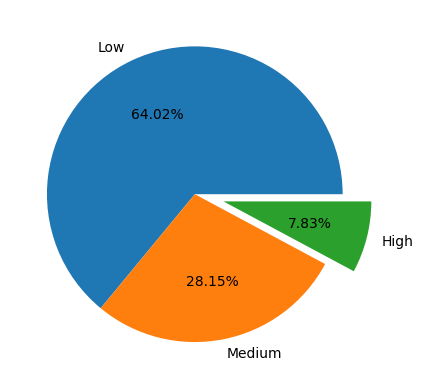

In [51]:
plt.pie(ds['ratings_cat'].value_counts(),
        labels=ds['ratings_cat'].value_counts().index,
        autopct='%1.2f%%', explode=[0, 0, .2])
plt.show()

In [52]:
# how many movies recieved high medium and low ratings by year

In [54]:
pd.crosstab(ds['Year'], ds['ratings_cat'])

ratings_cat,High,Low,Medium
Year,,,
2001,15,87,65
2002,21,105,60
2003,15,83,41
2004,14,87,49
2005,18,130,62
2006,19,184,89
2007,37,154,93
2008,21,165,74
2009,23,217,87


In [55]:
pd.crosstab(ds['Year'], ds['ratings_cat'], normalize=True)

ratings_cat,High,Low,Medium
Year,,,
2001,0.002844,0.016493,0.012322
2002,0.003981,0.019905,0.011374
2003,0.002844,0.015735,0.007773
2004,0.002654,0.016493,0.009289
2005,0.003412,0.024645,0.011754
2006,0.003602,0.034882,0.016872
2007,0.007014,0.029194,0.017630
2008,0.003981,0.031280,0.014028
2009,0.004360,0.041137,0.016493


In [56]:
pd.crosstab(ds['Year'], ds['ratings_cat'], normalize='index')

ratings_cat,High,Low,Medium
Year,,,
2001,0.089820,0.520958,0.389222
2002,0.112903,0.564516,0.322581
2003,0.107914,0.597122,0.294964
2004,0.093333,0.580000,0.326667
2005,0.085714,0.619048,0.295238
2006,0.065068,0.630137,0.304795
2007,0.130282,0.542254,0.327465
2008,0.080769,0.634615,0.284615
2009,0.070336,0.663609,0.266055


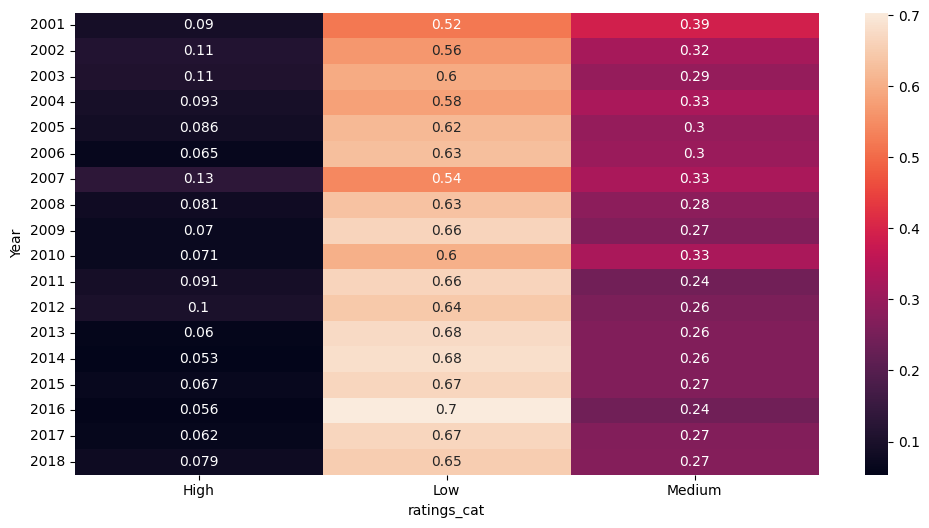

In [63]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(ds['Year'], ds['ratings_cat'], normalize='index'), annot=True)
plt.yticks(rotation=0)
plt.show()

In [64]:
# how many movies were produced each year by genre


In [67]:
pd.crosstab(ds['Year'], ds['Genre'], normalize='index')

Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
Year,,,,,,,,,,,,,,,,,,,
2001,0.155689,0.023952,0.047904,0.017964,0.341317,0.083832,0.257485,0.000000,0.000000,0.000000,0.053892,0.000000,0.005988,0.000000,0.000000,0.005988,0.000000,0.005988,0.000000
2002,0.129032,0.005376,0.048387,0.010753,0.360215,0.086022,0.263441,0.000000,0.005376,0.000000,0.064516,0.000000,0.000000,0.005376,0.016129,0.000000,0.000000,0.005376,0.000000
2003,0.093525,0.050360,0.014388,0.035971,0.402878,0.057554,0.223022,0.000000,0.021583,0.000000,0.071942,0.000000,0.000000,0.007194,0.000000,0.000000,0.000000,0.021583,0.000000
2004,0.113333,0.006667,0.060000,0.013333,0.406667,0.033333,0.246667,0.000000,0.000000,0.000000,0.093333,0.000000,0.000000,0.000000,0.006667,0.000000,0.000000,0.020000,0.000000
2005,0.138095,0.033333,0.014286,0.023810,0.390476,0.047619,0.195238,0.000000,0.000000,0.000000,0.128571,0.000000,0.009524,0.000000,0.000000,0.000000,0.000000,0.014286,0.004762
2006,0.092466,0.030822,0.034247,0.023973,0.376712,0.075342,0.202055,0.000000,0.006849,0.000000,0.150685,0.000000,0.000000,0.000000,0.003425,0.003425,0.000000,0.000000,0.000000
2007,0.102113,0.014085,0.035211,0.028169,0.387324,0.095070,0.204225,0.003521,0.003521,0.000000,0.119718,0.000000,0.000000,0.000000,0.000000,0.003521,0.000000,0.003521,0.000000
2008,0.119231,0.046154,0.038462,0.023077,0.323077,0.073077,0.219231,0.000000,0.003846,0.000000,0.138462,0.003846,0.000000,0.000000,0.000000,0.007692,0.000000,0.003846,0.000000
2009,0.137615,0.039755,0.027523,0.012232,0.373089,0.067278,0.171254,0.000000,0.009174,0.003058,0.134557,0.000000,0.000000,0.009174,0.003058,0.003058,0.000000,0.009174,0.000000


<Axes: xlabel='Genre', ylabel='Year'>

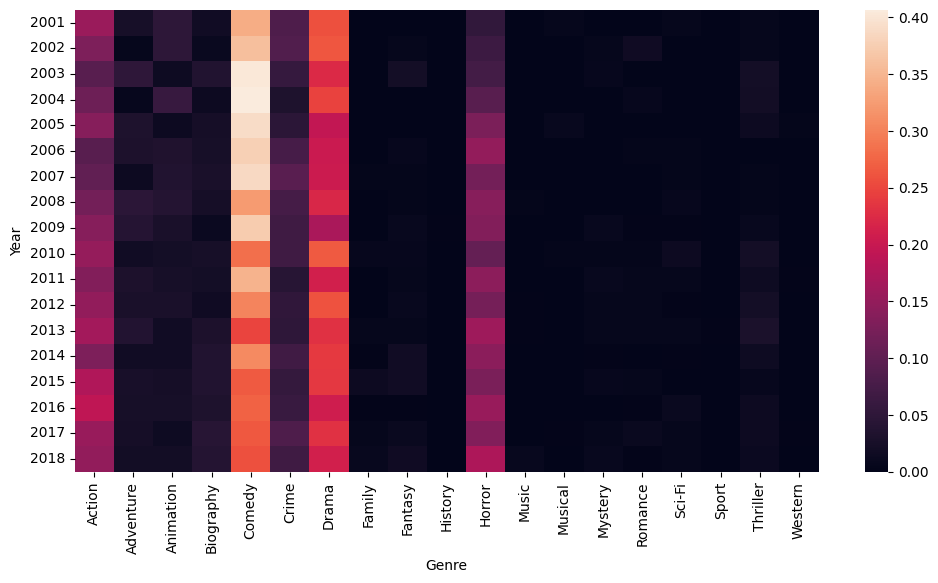

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(ds['Year'], ds['Genre'], normalize='index'))

In [74]:
ds[ds['Rating'] >= 7]

,Title,Year,Genre,Duration,Director,Rating,Popularity,ratings_cat
5,Star Wars: Episode III - Revenge of the Sith,2005,Action,140,George Lucas,7.5,99.70,High
7,Shrek,2001,Animation,90,"Andrew Adamson, Vicky Jenson",7.8,99.53,High
9,Treasure Planet,2002,Animation,95,"Ron Clements, John Musker",7.2,93.88,High
12,Spider-Man,2002,Action,121,Sam Raimi,7.3,99.66,High
13,"Goodnight, Joseph Parker",2004,Drama,81,Dennis Brooks,7.6,39.00,High
...,...,...,...,...,...,...,...,...
5200,BlacKkKlansman,2018,Biography,135,Spike Lee,7.5,96.93,High
5226,Thunder Road,2018,Comedy,92,Jim Cummings,7.1,76.57,High
5240,BROS. Last Call,2018,Comedy,92,Don Tjernagel,8.4,28.85,High
5254,Janelle MonÃ¡e: Dirty Computer,2018,Music,49,"Andrew Donoho, Chuck Lightning",7.3,16.33,High
